# First steps in Data Science

Does money make people happier?

# Setup

In [15]:
# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Data import

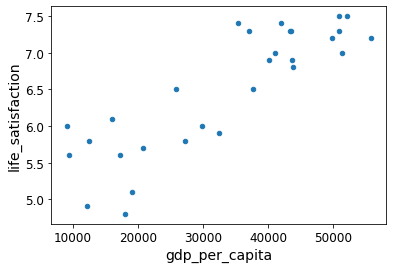

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the data from GitHub
LINK = "https://raw.githubusercontent.com/kirenz/datasets/master/oecd_gdp.csv"

df = pd.read_csv(LINK)

# Change column names 
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Visualize the data
df.plot(kind='scatter', x="gdp_per_capita", y='life_satisfaction')
plt.show()

# Simple linear regression model

In [18]:
import sklearn.linear_model
from sklearn.metrics import mean_squared_error


# Prepare the data
X = np.c_[df["gdp_per_capita"]]
y = np.c_[df["life_satisfaction"]]

# Select a linear regression model
lm_mod = sklearn.linear_model.LinearRegression()

# Train the model
lm_mod.fit(X, y)

# Model summary
print('Coefficients: \n', lm_mod.intercept_, lm_mod.coef_)

# Performance measure
lm_mod_pred = lm_mod.predict(X)
lm_mod_mse = mean_squared_error(y, lm_mod_pred)
lm_mod_rmse = np.sqrt(lm_mod_mse)
print('RMSE: \n', lm_mod_rmse)

# Make a prediction for a new GDP value
X_new = [[50000]]  # new GDP per capita
print('Prediction: \n', lm_mod.predict(X_new)) 


Coefficients: 
 [4.8530528] [[4.91154459e-05]]
RMSE: 
 0.42514742979153886
Prediction: 
 [[7.30882509]]


# K-Nearest Neighbor Model

In [13]:
import sklearn.neighbors

knn_mod = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

knn_mod.fit(X,y)

print(knn_mod.predict(X_new)) 

[[7.33333333]]
